## Research Question 

#### Group 4: Christopher Perez, Ernesto Perez, Kevin Santamaria

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as st
import math
import statsmodels.formula.api as smf 

### Part I. Importing the data

In [2]:
df = pd.read_csv('dec19pub.csv')
df2 = pd.read_csv('hhpub19.csv')

In [3]:
#Pg 132- 'In the last 12 months did (you/you or other adults in your household) ever cut the size of your meals or skip meals because there wasn't enough money for food?'

# 1:Yes 
# 2:No 
# -1: (blank)
# -2:Don't Know 
# -3:Refused
# 9:No Response

df['HESH2'].value_counts()

-1    124421
 2      9728
 1      4713
-9        45
-3        37
-2        20
Name: HESH2, dtype: int64

In [ ]:
### This is the value we have to use:

# ERN_SRCE

#source of earnings from longest job1(0:4)365Values:0 = niu 1 = wage and salary 2 = self employment 3 = farm self employment 4 = without pay

In [4]:
# Farm self-employment
#0 = nui 
#1 = yes
#2 = no

df2['HINC_FR'].value_counts()

2    67275
0    26288
1     1070
Name: HINC_FR, dtype: int64

In [5]:
# Own Business Self-Employment
#0 = nui 
#1 = yes
#2 = no

df2['HINC_SE'].value_counts()

2    62331
0    26288
1     6014
Name: HINC_SE, dtype: int64

In [6]:
# Region 
# 1 = Northeast          
# 2 = Midwest          
# 3 = South          
# 4 = West

df2["GEREG"].value_counts()

3    36727
4    24782
2    17504
1    15620
Name: GEREG, dtype: int64

In [7]:
# Metropolitan Status
# 1 = Metropolitan          2 = Non-metropolitan          3 = Not identified

df2["GTMETSTA"].value_counts()

1    75271
2    18375
3      987
Name: GTMETSTA, dtype: int64

In [8]:
# Family Income 
# -1=Not in universe         
#01=Less than $5,000         02=$5,000 to $7,499         03=$7,500 to $9,999         04=$10,000 to $12,499         05=$12,500 to $14,999         
#06=$15,000 to $19,999         07=$20,000 to $24,999         08=$25,000 to $29,999         09=$30,000 to $34,999         10=$35,000 to $39,999         11=$40,000 to $49,999         
#12=$50,000 to $59,999         13=$60,000 to $74,999         14=$75,000 to $99,999         15=$100,000 to $149,999         16=$150,000 and over

df2["HEFAMINC"].value_counts()

-1     25815
 15     8931
 14     8352
 16     7965
 13     6969
 12     5509
 11     5492
 9      3975
 10     3750
 7      3660
 8      3374
 6      2869
 4      1999
 1      1828
 5      1750
 3      1501
 2       894
Name: HEFAMINC, dtype: int64

In [9]:
# HOUSEHOLD TYPE
#00 = Non-interview household         01 = Married couple primary family (neither spouse in Armed Forces)         02 = Married couple primary family (one spouse in Armed Forces)         03 = Unmarried civilian male primary family householder         04 = Unmarried civilian female primary family householder         05 = Primary family household -reference person in Armed Forces and unmarried         06 = Civilian male nonfamily householder         07 = Civilian female nonfamily householder         08 = Nonfamily householder household -reference person in Armed Forces         09 = Group quarters with actual families  (This is new in 1994)         10 = Group quarters with secondary individuals only

df2["HRHTYPE"].value_counts()

1     33987
0     26288
7     11179
6     10152
4      8763
3      3695
2       488
10       30
8        19
5        18
9        14
Name: HRHTYPE, dtype: int64

In [10]:
# Telephone in Household
#0 = Not in universe          1 = Yes          2 = No

df2["H_TELHHD"].value_counts()

1    71932
0    19812
2     2889
Name: H_TELHHD, dtype: int64

In [11]:
# Tenure
# 0=Not in universe          1=Owned or being bought          2=Rented         3=No cash rent

df2["H_TENURE"].value_counts()

1    48839
2    26451
0    18369
3      974
Name: H_TENURE, dtype: int64

In [12]:
#Total HouseHold Income
#UNDER $2,500    2=$2,500 TO $4,999    3=$5,000 TO $7,499    4=$7,500 TO $9,999    5=$10,000 TO $12,499    6=$12,500 TO $14,999    7=$15,000 TO $17,499    8=$17,500 TO $19,999    9=$20,000 TO $22,499    10=$22,500 TO $24,999
#11=$25,000 TO $27,49912=$27,500 TO $29,99913=$30,000 TO $32,49914=$32,500 TO $34,99915=$35,000 TO $37,49916=$37,500 TO $39,99917=$40,000 TO $42,49918=$42,500 TO $44,99919=$45,000 TO $47,49920=$47,500 TO $49,999
#21=$50,000 TO $52,49922=$52,500 TO $54,99923=$55,000 TO $57,49924=$57,500 TO $59,99925=$60,000 TO $62,49926=$62,500 TO $64,99927=$65,000 TO $67,49928=$67,500 TO $69,99929=$70,000 TO $72,49930=$72,500 TO $74,999
#31=$75,000 TO $77,49932=$77,500 TO $79,99933=$80,000 TO $82,49934=$82,500 TO $84,99935=$85,000 TO $87,49936=$87,500 TO $89,99937=$90,000 TO $92,49938=$92,500 TO $94,99939=$95,000 TO $97,49940=$97,500 TO $99,99941=$100,000 AND OVER

df2["HHINC"].value_counts()

0     26288
41    21122
13     1827
21     1759
15     1716
11     1665
9      1664
1      1659
17     1623
7      1599
5      1592
19     1474
25     1469
8      1387
10     1375
23     1336
6      1330
31     1245
4      1228
29     1216
14     1202
12     1198
27     1186
16     1174
33     1113
20     1074
18     1064
22     1031
37     1008
24      988
35      988
26      975
28      907
39      851
32      834
30      822
34      716
36      665
38      610
40      595
3       583
2       475
Name: HHINC, dtype: int64

In [13]:
# Household income = self-employment income 
# 0 = none negative dollar amount = income losspositive dollar amount = income

print(df2["HSEVAL"].min(), df2["HSEVAL"].max())

-19356 1102199


In [14]:
# new_dataframe = df[["HRHHID", "HESH2"]], df2[['HINC_FR', 'HINC_SE', "H_NUMPER", "GEREG", "GTMETSTA", "HEFAMINC", "HH5TO18", "HRHTYPE", "H_TELHHD", "H_TENURE", "HHINC", "HSEVAL", "HDIS_YN", "HDIV_YN", "HINC_WC"]]

In [15]:
## Condensed Dataset
ndd = df2[['HINC_FR', 'HINC_SE', "H_NUMPER", "GEREG", "GTMETSTA", "HEFAMINC", "HH5TO18", "HRHTYPE", "H_TELHHD", "H_TENURE", "HHINC", "HSEVAL", "HDIS_YN", "HDIV_YN", "HINC_WC"]]

# Reported Incomes of Entrepreneurs vs Non-Entrepreneurs 

In [16]:
#Treating the data 

#Farmers and Non-Farmer Entrepreneurs ndd['HINC_FR'] and ndd['HINC_SE'] accordingly 

#Original: 
#0 = nui 
#1 = yes
#2 = no

#Changing to: 
# 1 = yes
# 0 = no 
# 3 = needs treatment 

ndd['HINC_FR']=ndd['HINC_FR'].map({1:1, 0:3, 2: 2}) 
ndd['HINC_SE']=ndd['HINC_SE'].map({1:1, 0:3, 2: 2})

<ipython-input-16-203ae1fac047>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndd['HINC_FR']=ndd['HINC_FR'].map({1:1, 0:3, 2: 2})
<ipython-input-16-203ae1fac047>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndd['HINC_SE']=ndd['HINC_SE'].map({1:1, 0:3, 2: 2})


In [17]:
# Must change values in separate lines of code, otherwise will get CopyWarning Error 

ndd['HINC_FR']=ndd['HINC_FR'].map({1:1, 3:3, 2: 0}) 
ndd['HINC_SE']=ndd['HINC_SE'].map({1:1, 3:3, 2: 0})

<ipython-input-17-cf02b67c29b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndd['HINC_FR']=ndd['HINC_FR'].map({1:1, 3:3, 2: 0})
<ipython-input-17-cf02b67c29b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndd['HINC_SE']=ndd['HINC_SE'].map({1:1, 3:3, 2: 0})


In [56]:
Farmer_Non_Ent = ndd[(ndd.HINC_FR == 0)]
Farmer_Ent = ndd[(ndd.HINC_FR == 1) & (ndd.HINC_SE == 1)]

In [57]:
Farmer_Ent

,HINC_FR,HINC_SE,H_NUMPER,GEREG,GTMETSTA,HEFAMINC,HH5TO18,HRHTYPE,H_TELHHD,H_TENURE,HHINC,HSEVAL,HDIS_YN,HDIV_YN,HINC_WC
116,1,1,1,1,2,10,0,7,1,1,16,24001,2,2,2
117,1,1,3,1,2,14,1,1,1,1,39,50001,2,2,2
318,1,1,2,1,2,13,0,1,1,1,41,10000,2,1,2
378,1,1,2,1,2,14,0,7,1,1,41,1,2,1,2
384,1,1,3,1,2,16,1,1,1,1,34,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94164,1,1,8,4,1,7,0,1,1,1,39,-1,2,2,2
94368,1,1,5,4,1,14,1,4,1,2,40,19900,2,2,2
94397,1,1,5,4,1,14,1,1,1,1,37,1,2,2,2
94471,1,1,2,4,1,3,1,4,1,2,15,12000,2,2,2


In [20]:
farmer_e_top_keys = Farmer_Ent['HHINC'].value_counts().index
farmer_e_top_values = Farmer_Ent['HHINC'].value_counts().tolist()/Farmer_Ent['HHINC'].value_counts().sum()

farmer_ne_top_keys = Farmer_Non_Ent['HHINC'].value_counts().index
farmer_ne_top_values = Farmer_Non_Ent['HHINC'].value_counts().tolist()/Farmer_Non_Ent['HHINC'].value_counts().sum()

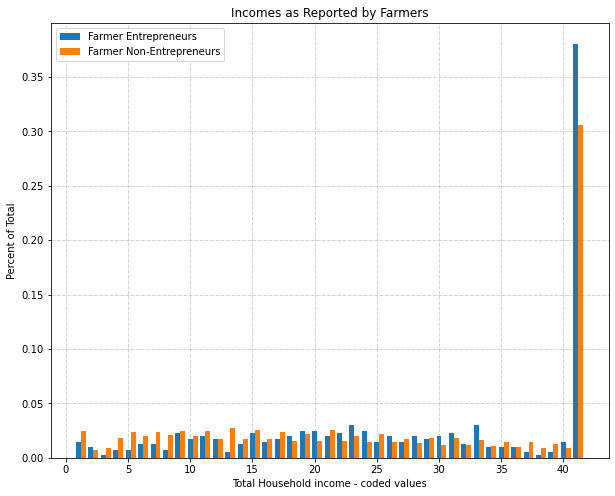

In [21]:
x1 = farmer_e_top_keys
x2 = farmer_ne_top_keys
y1 = farmer_e_top_values
y2 = farmer_ne_top_values

plt.figure(figsize=(10,8))
width = 0.40   
plt.bar(x1, y1, width, label='Farmer Entrepreneurs')
plt.bar(x2 + width, y2 , width, label='Farmer Non-Entrepreneurs')

plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.7)

plt.ylabel('Percent of Total')
plt.xlabel('Total Household income - coded values')
plt.title('Incomes as Reported by Farmers')
plt.legend(loc='best')
plt.show()

In [22]:
# Almost half of self-employed farmers reported incomes over $100k (Value = 41 in DF), 
# The second and third most common incomes reported were $50,000 to $52,499 (27) and $80,000 to $82,499 (24). 

# Likewise, the most common response for Non-Entrepreneurs was also 41 (over $100k) .
# The second and third most common responses were 13 ($30,000 to $32,499) and 21 ($50,000 TO $52,499) 

In [23]:
Non_Ent = ndd[(ndd.HINC_SE == 0)]
Ent = ndd[(ndd.HINC_SE == 1)]

In [24]:
e_top_keys = Ent['HHINC'].value_counts().index
e_top_values = Ent['HHINC'].value_counts().tolist()/Ent['HHINC'].value_counts().sum()

ne_top_keys = Non_Ent['HHINC'].value_counts().index
ne_top_values = Non_Ent['HHINC'].value_counts().tolist()/Non_Ent['HHINC'].value_counts().sum()

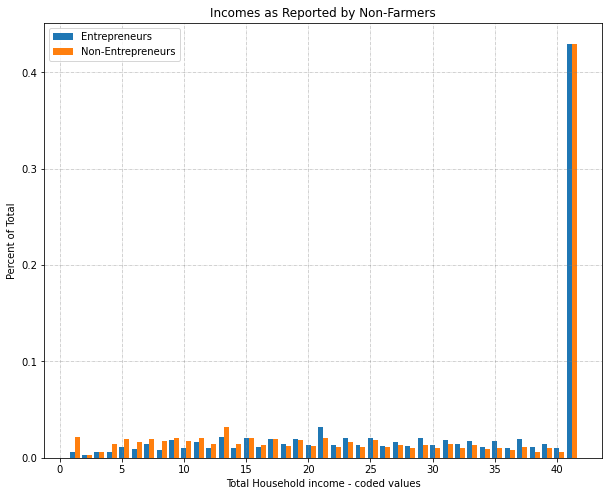

In [25]:
x1 = e_top_keys
x2 = ne_top_keys
y1 = e_top_values
y2 = e_top_values

plt.figure(figsize=(10,8))
width = 0.40   
plt.bar(x1, y1, width, label='Entrepreneurs')
plt.bar(x2 + width, y2 , width, label='Non-Entrepreneurs')

plt.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.7)

plt.ylabel('Percent of Total')
plt.xlabel('Total Household income - coded values')
plt.title('Incomes as Reported by Non-Farmers')
plt.legend(loc='best')
plt.show()

In [26]:
#The first graph explains the income as reported by farmers both entrepreneurs and non-entrepreneurs. 
#Notice how most farmers report incomes over 100k. In contrast, the second graph explains how non-farmers reported their income. 
#While the majority of entrepreneur non-farmers reported incomes of over 100k, non-entrepreneurs reported incomes at the extreme: less than $2,500

#Non-entrepreneurs non-farmers reported the lowest incomes in the survey

## How Entrepreneurs Fare per Region 

In [27]:
# Region 
# 1 = Northeast          
# 2 = Midwest          
# 3 = South          
# 4 = West

df2["GEREG"].value_counts()

3    36727
4    24782
2    17504
1    15620
Name: GEREG, dtype: int64

In [28]:
Farmer_Ent['GEREG'].value_counts()

2    165
3    112
4     93
1     32
Name: GEREG, dtype: int64

In [29]:
Ent['GEREG'].value_counts()

3    2019
4    1985
2    1063
1     947
Name: GEREG, dtype: int64

In [30]:
# Most entrepreneurs (both farmers and non-farmers) are concentrated in the South 

# Self-employment Income 

In [31]:
def hypothesis_test(p):
    if p <= 0.05: return 'Reject the Null'
    else: return 'Fail to Reject the Null'

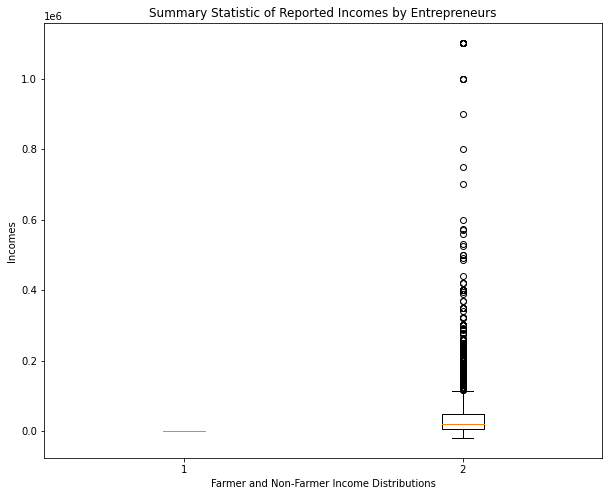

In [32]:
plt.figure(figsize=(10, 8))
plt.boxplot([Farmer_Ent['HSEVAL'],Ent['HSEVAL']])
plt.xlabel('Farmer and Non-Farmer Income Distributions')
plt.ylabel('Incomes')
plt.title('Summary Statistic of Reported Incomes by Entrepreneurs')
plt.show()

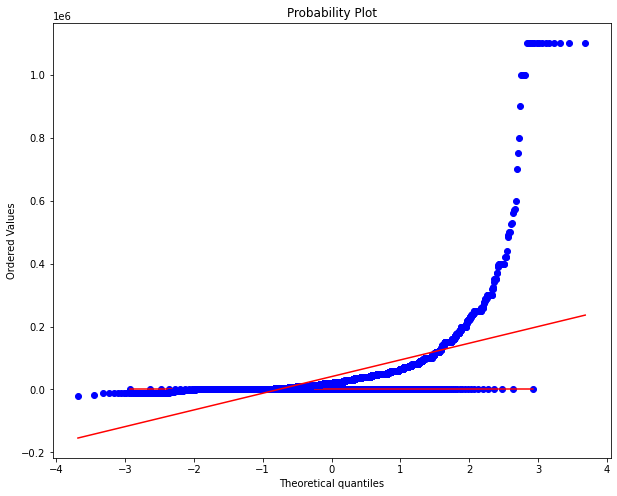

In [33]:
plt.figure(figsize=(10, 8))
st.probplot(Farmer_Ent['HSEVAL'],dist='norm', fit=True, plot=plt)
st.probplot(Ent['HSEVAL'], dist='norm', fit=True, plot=plt)
plt.show()

In [34]:
hypothesis_test(st.normaltest(Farmer_Ent['HSEVAL'])[1])

'Reject the Null'

In [35]:
hypothesis_test(st.normaltest(Ent['HSEVAL'])[1])

'Reject the Null'

In [36]:
Farmer_Ent_Cube =np.cbrt(Farmer_Ent['HSEVAL'])
Ent_Cube = np.cbrt(Ent['HSEVAL'])

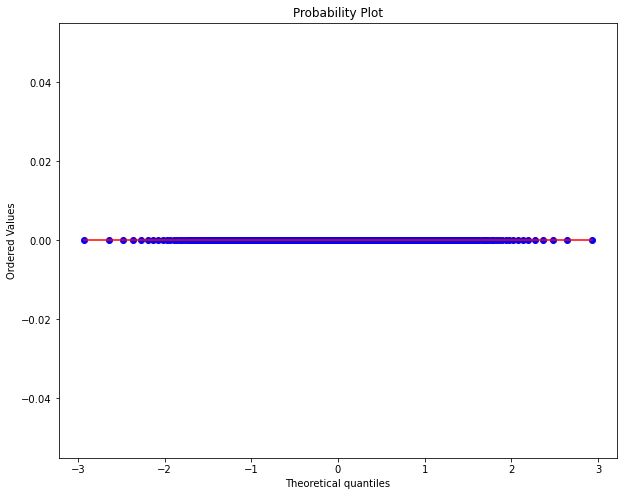

In [37]:
plt.figure(figsize=(10, 8))
st.probplot(Farmer_Ent_Cube ,dist='norm', fit=True, plot=plt)
plt.show()

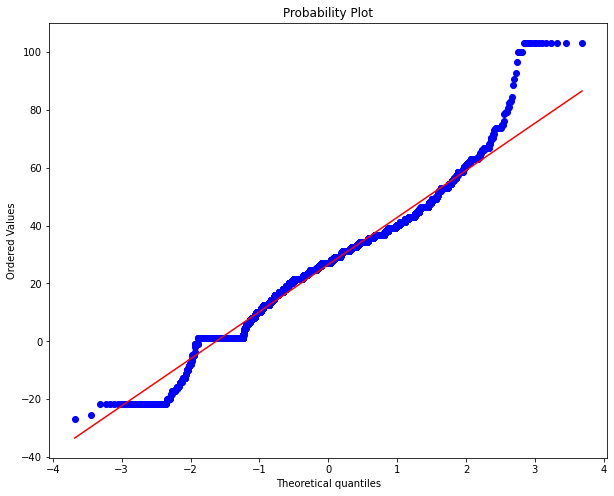

In [38]:
plt.figure(figsize=(10, 8))
st.probplot(Ent_Cube ,dist='norm', fit=True, plot=plt)
plt.show()

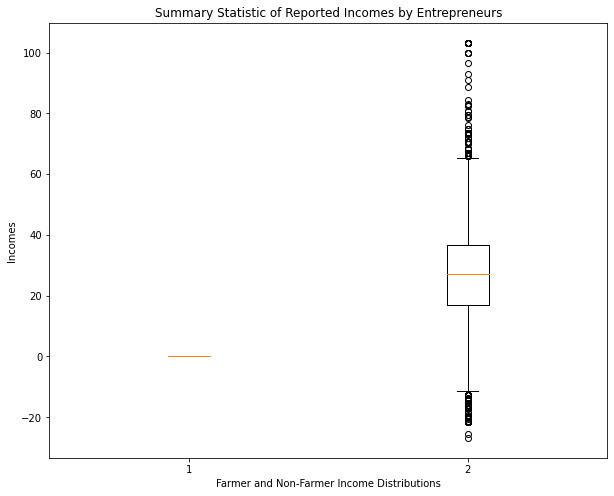

In [39]:
plt.figure(figsize=(10, 8))
plt.boxplot([Farmer_Ent_Cube,Ent_Cube])
plt.xlabel('Farmer and Non-Farmer Income Distributions')
plt.ylabel('Incomes')
plt.title('Summary Statistic of Reported Incomes by Entrepreneurs')
plt.show()

In [40]:
hypothesis_test(st.normaltest(Farmer_Ent_Cube)[1])

'Reject the Null'

In [41]:
hypothesis_test(st.normaltest(Farmer_Ent_Cube)[1])

'Reject the Null'

In [42]:
#Even after the transformation, the data is not normally distributed 

# Number of Children Ages 5 through 18

In [43]:
#Number of persons in household age 5 to 18 excluding family heads and spouse 
# 00 = None      01-16 = Number persons 5 to 18

ndd["HH5TO18"].value_counts()

0    72759
1    10622
2     7550
3     2694
4      718
5      216
6       52
7       15
8        4
9        3
Name: HH5TO18, dtype: int64

In [44]:
Farmer_Ent_Kids = (ndd[(ndd.HINC_FR == 1) & (ndd.HH5TO18)])
Ent_Kids = (ndd[(ndd.HINC_SE == 1) & (ndd.HH5TO18) & (ndd.HINC_FR == 0)])

In [45]:
# Mean number of children Farmers = 1.566524, Non-Farmers = 1.469170
#Farmer_Ent_Kids = (ndd[(ndd.HINC_FR == 1) & (ndd.HH5TO18)]).mean()
#Ent_Kids = (ndd[(ndd.HINC_SE == 1) & (ndd.HH5TO18) & (ndd.HINC_FR == 0)]).mean()

In [46]:
Farmer_Ent_Kids

,HINC_FR,HINC_SE,H_NUMPER,GEREG,GTMETSTA,HEFAMINC,HH5TO18,HRHTYPE,H_TELHHD,H_TENURE,HHINC,HSEVAL,HDIS_YN,HDIV_YN,HINC_WC
117,1,1,3,1,2,14,1,1,1,1,39,50001,2,2,2
384,1,1,3,1,2,16,1,1,1,1,34,2,2,2,2
499,1,1,5,1,1,6,3,1,1,1,7,-2100,2,2,1
1261,1,0,3,1,2,15,1,1,1,1,41,0,2,1,2
1740,1,1,2,1,1,11,1,4,1,1,21,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93160,1,0,4,4,2,11,1,4,1,2,29,0,2,2,2
94121,1,1,3,4,1,2,1,1,1,1,41,1,2,2,2
94368,1,1,5,4,1,14,1,4,1,2,40,19900,2,2,2
94397,1,1,5,4,1,14,1,1,1,1,37,1,2,2,2


In [47]:
Ent_Kids

,HINC_FR,HINC_SE,H_NUMPER,GEREG,GTMETSTA,HEFAMINC,HH5TO18,HRHTYPE,H_TELHHD,H_TENURE,HHINC,HSEVAL,HDIS_YN,HDIV_YN,HINC_WC
29,0,1,11,1,2,8,5,1,1,1,21,50000,2,2,2
119,0,1,5,1,2,14,3,1,1,1,37,80000,2,2,2
184,0,1,2,1,2,12,1,3,1,1,20,45000,2,2,2
239,0,1,7,1,2,11,5,1,1,1,19,36000,2,2,2
314,0,1,5,1,2,8,3,1,1,1,41,80000,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94323,0,1,5,4,1,16,1,1,1,1,41,236596,2,1,2
94418,0,1,4,4,1,4,1,1,1,1,7,15000,2,2,2
94477,0,1,3,4,1,11,1,4,1,1,18,20000,2,2,2
94519,0,1,5,4,1,15,3,1,1,1,41,1099999,2,2,2


# Own financial assets in a company 

In [48]:
# At any time during 20.. did anyone in this household: own any shares of stock in corporations or any mutual fund shares?
# 0 = niu 1 = yes 2 = no

In [49]:
Farmer_Ent["HDIV_YN"].map({1:1, 0:3, 2:2})
Farmer_Ent["HDIV_YN"].value_counts()

2    311
1     91
Name: HDIV_YN, dtype: int64

In [50]:
Farmer_Ent["HDIV_YN"].map({1:1, 3:3, 2:0})
Farmer_Ent["HDIV_YN"].value_counts()

2    311
1     91
Name: HDIV_YN, dtype: int64

In [51]:
Ent['HDIV_YN'].map({1:1, 2:0})
Ent["HDIV_YN"].value_counts()

2    4625
1    1389
Name: HDIV_YN, dtype: int64

# Unemployment Compensation

In [52]:
# unemployment compensation
# 0 = niu 1 = yes 2 = no
ndd["HINC_WC"].value_counts()

2    67856
0    26288
1      489
Name: HINC_WC, dtype: int64

In [53]:
Farmer_Ent_Comp = ndd[(ndd.HINC_FR == 1) & (ndd.HINC_WC ==1)]
Ent_Comp = ndd[(ndd.HINC_SE == 1) & (ndd.HINC_WC ==1) & (ndd.HINC_FR == 0)]

In [54]:
len(Farmer_Ent_Comp)

13

In [55]:
len(Ent_Dis)

NameError: name 'Ent_Dis' is not defined

# Disability 

In [ ]:
# Does anyone in the household have a disability or health problem which prevented them from working, even for a short time, or which limited the work they could do?
# 0 = niu 1 = yes 2 = no

ndd["HDIS_YN"].value_counts()

In [ ]:
Farmer_Ent_Dis = ndd[(ndd.HINC_FR == 1) & (ndd.HDIS_YN ==1)]
Ent_Dis = ndd[(ndd.HINC_SE == 1) & (ndd.HDIS_YN ==1) & (ndd.HINC_FR == 0)]

In [ ]:
len(Farmer_Ent_Dis)

In [ ]:
len(Ent_Dis)

# Workers' Compensation 

In [ ]:
#  workers compensation
#0 = niu 1 = yes 2 = no

ndd["HINC_WC"].value_counts()

In [ ]:
Farmer_Ent_WC = ndd[(ndd.HINC_FR == 1) & (ndd.HINC_WC ==1)]
Ent_WC = ndd[(ndd.HINC_SE == 1) & (ndd.HINC_WC ==1) & (ndd.HINC_FR == 0)]

In [ ]:
Farmer_Ent_WC

In [ ]:
Ent_WC 